### 티처블머신 (이미지에서 남/여 구분)



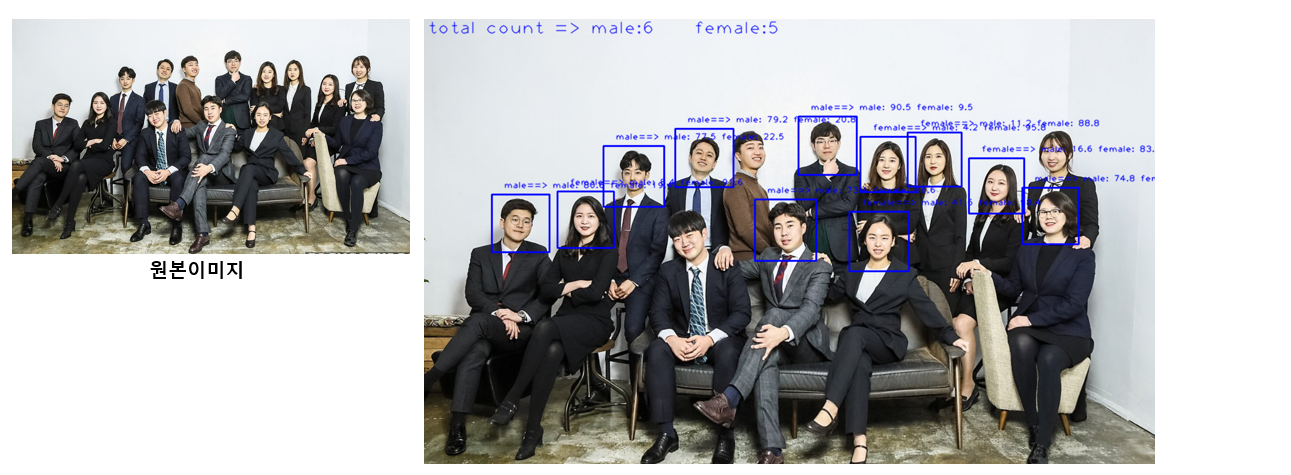

#### [작업순서]

1. 티처블머신 남/여 구분 모델 함수정의
2. OpenCV로 이미지에서 얼굴부분 추출 후 
   티처블머신 남/여 구분 모델 적용
   > * OpenCV로 얼굴 인식하기: https://minimin2.tistory.com/139
   > * OpenCV로 이미지에 글자 합성하기: https://coding-moomin.tistory.com/9

In [79]:
from keras.models import load_model
from PIL import Image, ImageOps
import numpy as np
import matplotlib.pyplot as plt

model = load_model('./converted_keras/keras_model.h5')

def modelP(imgArea):
    
    data = np.ndarray(shape=(1, 224, 224, 3), dtype=np.float32)
    image = Image.open(imgArea)
    size = (224, 224)
    image = ImageOps.fit(image, size, Image.ANTIALIAS)
    image_array = np.asarray(image)
    normalized_image_array = (image_array.astype(np.float32) / 127.0) - 1
    data[0] = normalized_image_array
    prediction = model.predict(data)

    class_name=['male','female']
    txt=class_name[np.argmax(prediction)] + '==> male:' + str(prediction[0][0]*100) + '    female: ' +  str(prediction[0][1]*100)

    return txt

In [80]:
#오픈CV로 쉽게 얼굴 인식하기 =>https://minimin2.tistory.com/139

import cv2
aaa=[]
# haarcascade 불러오기
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

# 이미지 불러오기
img = cv2.imread('open_cv_1.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 얼굴 찾기
faces = face_cascade.detectMultiScale(gray, 1.3, 5)

#print(faces)
cnt=0
for (x, y, w, h) in faces:

    cv2.rectangle(img, (x-20, y-20), (x + w+20, y + h+20), (255, 0, 0), 2)
    
    roi_color = img[y-20:y + h+20, x-20:x + w+20]
    cv2.imwrite('tmp.jpg',roi_color)
    pre=modelP('tmp.jpg')
    
    aaa.append(pre)
    



'total count => male:6    female:5'

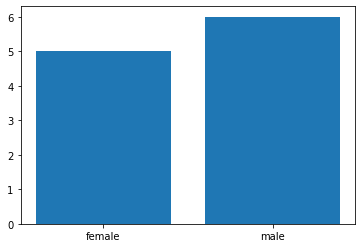

In [81]:
#이미지 속 남/여 인원 현황
gubun=[i.split('==>')[0] for i in aaa]    
re=np.unique(gubun, return_counts=True)
plt.bar(re[0],re[1])

txt='total count => male:' + str(re[1][1]) + '    female:'+str(re[1][0])
txt

In [86]:
#이미지에 글자 합성 => https://coding-moomin.tistory.com/9
img = cv2.imread('open_cv_1.jpg')

# 폰트 색상 지정
blue = (255, 0, 0)
green= (0, 255, 0)
red= (0, 0, 255)
white= (255, 255, 255) 
font =  cv2.FONT_HERSHEY_PLAIN

img = cv2.putText(img, txt, (10, 30), font, 2, blue, 1, cv2.LINE_AA)

for (x, y, w, h),result in zip(faces,aaa):
    cv2.rectangle(img, (x-20, y-20), (x + w+20, y + h+20), (255, 0, 0), 2)
    img = cv2.putText(img, result, (x, y-30), font, 1, blue, 1, cv2.LINE_AA)
cv2.imshow('gggg',img)
cv2.waitKey(0)
cv2.destroyAllWindows()